## Analyze Trained Ejik Model

In [54]:
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
out_path = r'c:\temp\ejik'

In [25]:
df_brain = pd.read_csv(os.path.join(out_path, 'brain.csv'))
df_random = pd.read_csv(os.path.join(out_path, 'random.csv'))
df = pd.concat({'random': df_random, 'brain':df_brain}, axis=1)

In [26]:
df.head()

brain        random       
  length reward length reward
0     67  -3.08     21  -3.18
1     26  -3.04     67  -4.48
2     67  -2.56     67  -3.40
3     67  -1.56     44  -3.77
4     67  -2.54     64  -4.01

In [34]:
df = df.reset_index()

In [77]:
rand_episode = df.loc[:, ('random', 'length')]
brain_episode = df.loc[:, ('brain', 'length')]
brain_reward = df.loc[:, ('brain', 'reward')]
random_reward = df.loc[:, ('random', 'reward')]

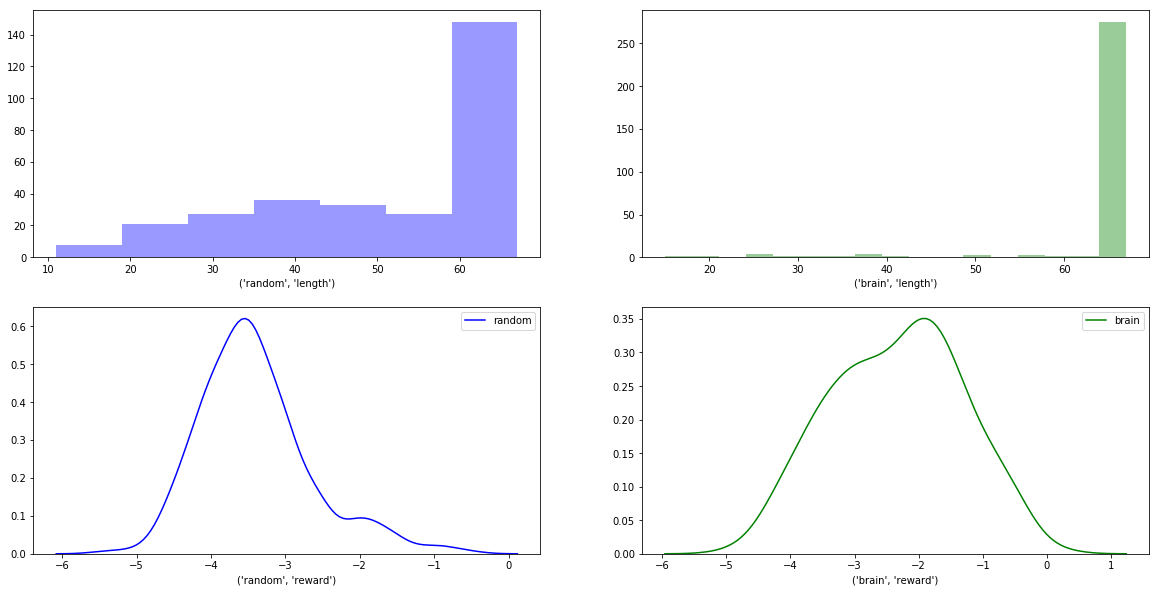

In [88]:
f, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.distplot(rand_episode, hist=True, kde=False, color="b", ax=axes[0, 0], label="random")
sns.distplot(brain_episode, hist=True,kde=False, color="g", ax=axes[0, 1], label="brain")
sns.distplot(random_reward, hist=False, color="b", ax=axes[1, 0], label="random")
sns.distplot(brain_reward, hist=False, color="g", ax=axes[1, 1], label="brain")

In [86]:
print(f"Mean trained reward: {brain_reward.mean():.3f}, std: {brain_reward.std():.3f}")
print(f"Mean random reward: {random_reward.mean():.3f}, std: {random_reward.std():.3f}")


Mean trained reward: -2.337, std: 1.020
Mean random reward: -3.408, std: 0.758
